<a href="https://colab.research.google.com/github/zeeshanzaidi92/YorkML_Classification/blob/main/Heart_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML1000 - Project 1 - Heart Training


# Environment Setup

In [ ]:
!pip install pycaret -q

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [ ]:
import numpy as np
import pandas as pd

from pycaret.classification import *
from pandas_profiling import ProfileReport
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# running this fixed the plots not displaying
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
plt.close('all')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#profile = ProfileReport(dataset, title="Heart Dataset", html={'style': {'full_width': True}})
#profile.to_notebook_iframe()
#profile.to_file(output_file="Heart_UCI_Profile.html")

# Data Import/Setup

In [ ]:
df_path = 'gdrive/My Drive/Colab Notebooks/heart_cleveland_upload.csv'  #change dir to your project folder
dataset = pd.read_csv(df_path)
dataset.shape

(297, 14)

In [ ]:
dataset.head(1)

age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  condition
0   69    1   0       160   234  ...      0.1      1   1     0          0

[1 rows x 14 columns]

In [ ]:
# Rename categorical modes for better graphs/understanding
dataset.sex = dataset.sex.map({0:'Female',1:'Male'})
dataset.cp = dataset.cp.map({3:'Asymptomatic', 1:'Atypical', 2:'Not Anginal', 0:'Typical'})
dataset.fbs = dataset.fbs.map({0:'<120mg',1:'120mg+'})
dataset.restecg= dataset.restecg.map({0:'Normal',1:'ST Abnormality',2:'LV Hypertrophy'})
dataset.exang = dataset.exang.map({0:'No',1:'Yes'})
dataset.slope = dataset.slope.map({0:'Upslope',1:'Flat',2:'Downslope'})
dataset.thal = dataset.thal.map({1:'Fixed Defect',0:'Normal',2:'Reversable Defect'})
#dataset.condition = dataset.condition.map({0:1, 1:0}) #Reverse order for better graph display?
dataset.condition = dataset.condition.map({0:'No', 1:'Yes'})

# bin oldpeak
bins= [-0.1,0.1,1.5,np.inf]
names=["None","Low","High"]
dataset.oldpeak=pd.cut(dataset.oldpeak, bins, labels=names)

# Renaming columns
dataset.columns = ['Age', 'Gender', 'Chest_Pain', 'Blood_Pressure', 'Cholesterol', 'Blood_Sugar', 'Rest_ECG', 'Max_Heart_Rate',
       'Exercise_Angina', 'ST_Depression', 'ST_Slope', 'Marked_Vessels', 'Thallium', 'Heart_Disease']

dataset.head(4)

Age  Gender Chest_Pain  ...  Marked_Vessels  Thalassemia Heart_Disease
0   69    Male    Typical  ...               1       Normal            No
1   69  Female    Typical  ...               2       Normal            No
2   66  Female    Typical  ...               0       Normal            No
3   65    Male    Typical  ...               1       Normal           Yes

[4 rows x 14 columns]

In [ ]:
data = dataset.sample(frac=0.90, random_state=54321)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (267, 14)
Unseen Data For Predictions (30, 14)


In [ ]:
data.head(1)

Age  Gender    Chest_Pain  ...  Marked_Vessels  Thalassemia Heart_Disease
0   62  Female  Asymptomatic  ...               0       Normal           Yes

[1 rows x 14 columns]

In [ ]:
#Decision:  We dropped the "fbs" column because in a small dataset there is are only two values and they are split into a 85.5%/14.5% split. On a small data set this is likely to skew the results

#data.drop('Blood_Sugar', axis=1, inplace=True)
#data.head(1)



In [ ]:
#Set variable for name of target column
TARGET_COLUMN = 'Heart_Disease'

exp_clf102 = setup(
      data = data, 
      target = TARGET_COLUMN, 
#      feature_selection = True,
#      feature_selection_threshold = .5,
      pca = True, 
#      pca_components = .999, 
#      combine_rare_levels = True, 
#      rare_level_threshold = 0.05,
#      ignore_features = ['oldpeak'],
      normalize = True, 
#      transformation = True, 
      remove_multicollinearity = True, 
#      multicollinearity_threshold = 0.70,
#      numeric_features = ['Marked_Vessels'],
      bin_numeric_features = ['Age'],
      ordinal_features = {'ST_Depression': ['None','Low','High']},
#      feature_selection = True,
#      profile=True,
      silent=True,
      train_size = 0.9,
      remove_outliers = True,
      #log_experiment = True,
      #experiment_name = 'P1_Heart',
      session_id=123)

Description             Value
0                               session_id               123
1                                   Target     Heart_Disease
2                              Target Type            Binary
3                            Label Encoded     No: 0, Yes: 1
4                            Original Data         (267, 14)
5                           Missing Values             False
6                         Numeric Features                 4
7                     Categorical Features                 9
8                         Ordinal Features              True
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (228, 23)
12                    Transformed Test Set          (27, 23)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              94e6
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components              0.99
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning              True
40                         Remove Outliers              True
41                      Outliers Threshold              0.05
42                Remove Multicollinearity              True
43             Multicollinearity Threshold               0.9
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

# Compare models

In [ ]:
#Compare models common parameters 
#Decision:  Num folds = 10 because
#Decision: Optimize_for = Accuracy because
NUM_FOLDS = 10
OPTIMIZE_FOR = 'Recall'

In [ ]:
top3 = compare_models(
      fold=NUM_FOLDS,
      n_select=3,
      sort=OPTIMIZE_FOR,
      turbo=False)

Model  Accuracy     AUC  Recall   Prec.  \
mlp                        MLP Classifier    0.7976  0.9052  0.7845  0.8042   
gbc          Gradient Boosting Classifier    0.8024  0.8819  0.7845  0.8079   
rbfsvm                SVM - Radial Kernel    0.8152  0.8979  0.7836  0.8261   
lightgbm  Light Gradient Boosting Machine    0.8148  0.8828  0.7818  0.8219   
lr                    Logistic Regression    0.8067  0.9007  0.7655  0.8226   
et                 Extra Trees Classifier    0.8026  0.8949  0.7645  0.8130   
qda       Quadratic Discriminant Analysis    0.7761  0.8443  0.7564  0.7761   
knn                K Neighbors Classifier    0.8283  0.8738  0.7555  0.8676   
ridge                    Ridge Classifier    0.8111  0.0000  0.7373  0.8485   
lda          Linear Discriminant Analysis    0.8111  0.8949  0.7373  0.8485   
dt               Decision Tree Classifier    0.7370  0.7373  0.7355  0.7101   
rf               Random Forest Classifier    0.7897  0.8760  0.7273  0.8223   
svm                   SVM - Linear Kernel    0.7583  0.0000  0.7173  0.7787   
nb                            Naive Bayes    0.7634  0.8548  0.7091  0.7826   
gpc           Gaussian Process Classifier    0.7974  0.8948  0.7064  0.8360   
ada                  Ada Boost Classifier    0.7107  0.7932  0.6909  0.6914   

              F1   Kappa     MCC  TT (Sec)  
mlp       0.7792  0.5944  0.6125     0.649  
gbc       0.7829  0.6037  0.6204     0.158  
rbfsvm    0.7941  0.6282  0.6422     0.023  
lightgbm  0.7938  0.6267  0.6367     0.076  
lr        0.7809  0.6104  0.6251     0.027  
et        0.7731  0.6009  0.6160     0.468  
qda       0.7550  0.5509  0.5635     0.017  
knn       0.8015  0.6526  0.6638     0.118  
ridge     0.7772  0.6172  0.6329     0.014  
lda       0.7772  0.6172  0.6329     0.016  
dt        0.7189  0.4720  0.4770     0.018  
rf        0.7585  0.5752  0.5919     0.505  
svm       0.7326  0.5138  0.5287     0.015  
nb        0.7300  0.5228  0.5372     0.017  
gpc       0.7598  0.5883  0.6003     0.073  
ada       0.6776  0.4181  0.4298     0.114

# Model 1 - Exploration

In [ ]:
#comment out "create model" and switch to using top3[0] for automated model run/selection
#
#model1 = top3[0]
model1 = create_model('mlp')
display(model1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7826  0.9615  0.9000  0.6923  0.7826  0.5725  0.5923
1       0.8261  0.8538  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9565  0.9462  1.0000  0.9091  0.9524  0.9125  0.9161
3       0.7826  0.8636  0.6364  0.8750  0.7368  0.5594  0.5800
4       0.7391  0.8485  0.6364  0.7778  0.7000  0.4733  0.4808
5       0.7826  0.9773  0.5455  1.0000  0.7059  0.5560  0.6205
6       0.6522  0.8258  0.7273  0.6154  0.6667  0.3083  0.3130
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.6364  0.7917  0.7000  0.5833  0.6364  0.2787  0.2833
9       0.8182  0.9833  1.0000  0.7143  0.8333  0.6452  0.6901
Mean    0.7976  0.9052  0.7845  0.8042  0.7792  0.5944  0.6125
SD      0.1089  0.0721  0.1647  0.1426  0.1132  0.2167  0.2160

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
evaluate_model(model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

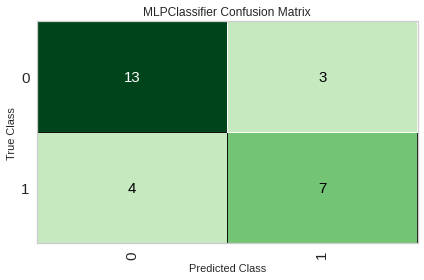

In [ ]:
plot_model(model1, plot='confusion_matrix')

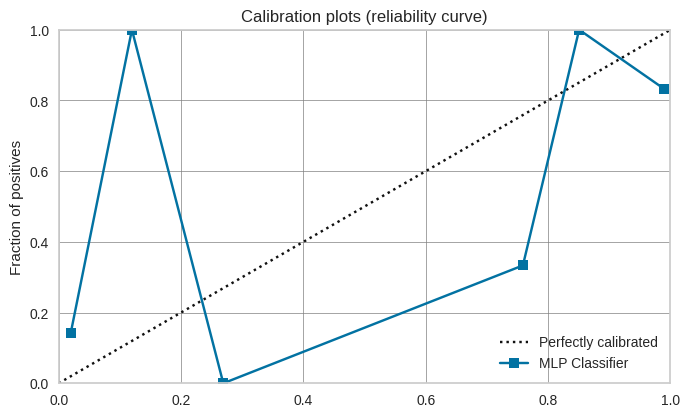

In [ ]:
plot_model(model1, plot='calibration')

In [ ]:
tuned_model1=tune_model(model1, optimize=OPTIMIZE_FOR,fold=NUM_FOLDS)
score_tuned_model1=pull()
display(tuned_model1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9385  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.9308  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.8696  0.9692  0.9000  0.8182  0.8571  0.7376  0.7405
3       0.7826  0.8030  0.5455  1.0000  0.7059  0.5560  0.6205
4       0.7826  0.8636  0.6364  0.8750  0.7368  0.5594  0.5800
5       0.9130  0.9167  0.8182  1.0000  0.9000  0.8244  0.8374
6       0.8261  0.8712  0.8182  0.8182  0.8182  0.6515  0.6515
7       0.9565  0.9924  0.9091  1.0000  0.9524  0.9125  0.9161
8       0.6818  0.8333  0.7000  0.6364  0.6667  0.3636  0.3651
9       0.8636  0.9583  1.0000  0.7692  0.8696  0.7317  0.7596
Mean    0.8328  0.9077  0.7927  0.8542  0.8103  0.6629  0.6783
SD      0.0721  0.0590  0.1355  0.1152  0.0849  0.1454  0.1432

MLPClassifier(activation='identity', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
evaluate_model(tuned_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

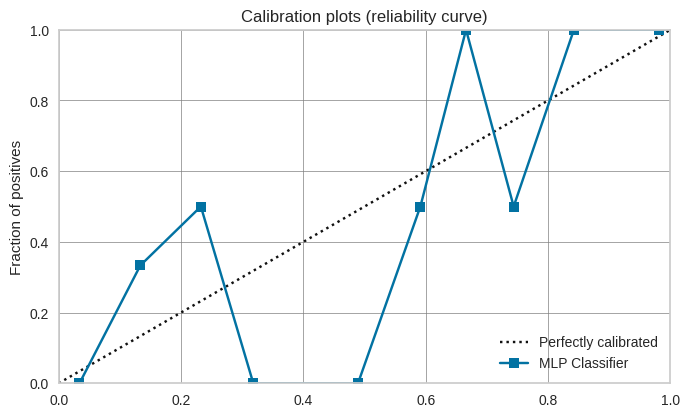

In [ ]:
plot_model(tuned_model1, plot='calibration')

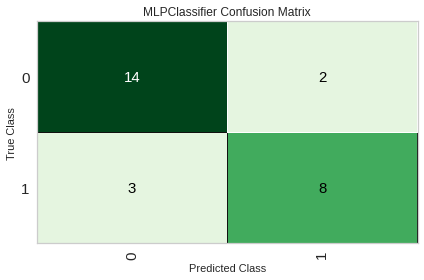

In [ ]:
plot_model(tuned_model1, plot='confusion_matrix')

In [ ]:
calibrated_model1 = calibrate_model(tuned_model1)
score_calibrated_model1=pull()
display(calibrated_model1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9385  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.9154  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9565  0.9769  1.0000  0.9091  0.9524  0.9125  0.9161
3       0.7391  0.7955  0.5455  0.8571  0.6667  0.4692  0.5017
4       0.7391  0.8182  0.5455  0.8571  0.6667  0.4692  0.5017
5       0.7826  0.9318  0.5455  1.0000  0.7059  0.5560  0.6205
6       0.6522  0.7727  0.7273  0.6154  0.6667  0.3083  0.3130
7       0.9130  0.9848  0.9091  0.9091  0.9091  0.8258  0.8258
8       0.7273  0.8000  0.7000  0.7000  0.7000  0.4500  0.4500
9       0.8182  0.9500  0.9000  0.7500  0.8182  0.6393  0.6500
Mean    0.7980  0.8884  0.7473  0.8223  0.7681  0.5922  0.6091
SD      0.0859  0.0780  0.1624  0.1096  0.0992  0.1725  0.1684

CalibratedClassifierCV(base_estimator=MLPClassifier(activation='identity',
                                                    alpha=0.5,
                                                    batch_size='auto',
                                                    beta_1=0.9, beta_2=0.999,
                                                    early_stopping=False,
                                                    epsilon=1e-08,
                                                    hidden_layer_sizes=[100],
                                                    learning_rate='constant',
                                                    learning_rate_init=0.001,
                                                    max_fun=15000, max_iter=500,
                                                    momentum=0.9,
                                                    n_iter_no_change=10,
                                                    nesterovs_momentum=True,
                                         

In [ ]:
evaluate_model(calibrated_model1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

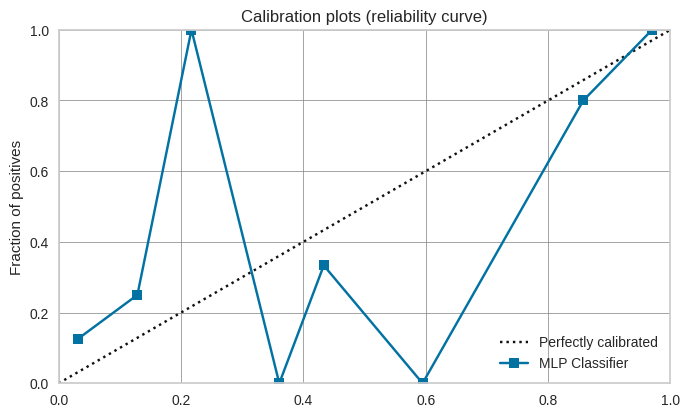

In [ ]:
plot_model(calibrated_model1,plot='calibration')

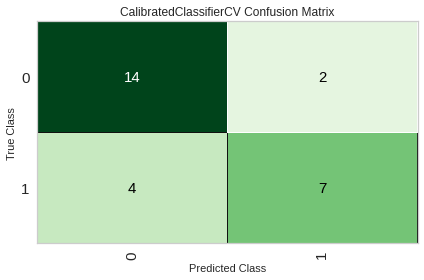

In [ ]:
plot_model(calibrated_model1, plot='confusion_matrix')

In [ ]:
#Decide between tuned model and calibrated model
#used as base for bag/boost

move_forward_model = tuned_model1
#move_forward_model = calibrated_model1

In [ ]:
bagged_model1 = ensemble_model(move_forward_model)
score_bagged_model1=pull()

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9308  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.8923  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9130  0.9769  0.9000  0.9000  0.9000  0.8231  0.8231
3       0.7391  0.7955  0.5455  0.8571  0.6667  0.4692  0.5017
4       0.7391  0.8485  0.5455  0.8571  0.6667  0.4692  0.5017
5       0.8696  0.9015  0.7273  1.0000  0.8421  0.7356  0.7628
6       0.7391  0.8561  0.8182  0.6923  0.7500  0.4812  0.4886
7       0.9565  0.9924  0.9091  1.0000  0.9524  0.9125  0.9161
8       0.7273  0.8333  0.7000  0.7000  0.7000  0.4500  0.4500
9       0.8636  0.9667  1.0000  0.7692  0.8696  0.7317  0.7596
Mean    0.8200  0.8994  0.7745  0.8401  0.7943  0.6365  0.6516
SD      0.0774  0.0631  0.1485  0.1054  0.0940  0.1565  0.1535

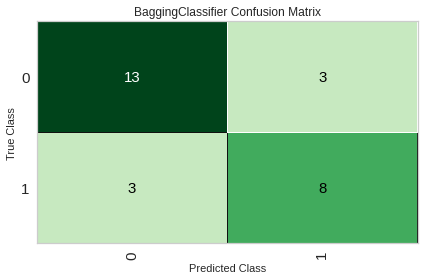

In [ ]:
plot_model(bagged_model1, plot='confusion_matrix')

In [ ]:
#boosted_model1 = ensemble_model(move_forward_model,method = 'Boosting')
#score_boosted_model1=pull()

In [ ]:
#plot_model(boosted_model1, plot='confusion_matrix')

# Blend Models

In [ ]:
blend_soft = blend_models(estimator_list = [top3[0], top3[1], top3[2]], method='soft')
score_blend_soft=pull()

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9538  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.8769  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9130  0.9692  0.9000  0.9000  0.9000  0.8231  0.8231
3       0.8261  0.8409  0.6364  1.0000  0.7778  0.6462  0.6908
4       0.7391  0.8636  0.5455  0.8571  0.6667  0.4692  0.5017
5       0.8696  0.9470  0.7273  1.0000  0.8421  0.7356  0.7628
6       0.7391  0.8561  0.8182  0.6923  0.7500  0.4812  0.4886
7       0.9130  0.9924  0.8182  1.0000  0.9000  0.8244  0.8374
8       0.6818  0.8333  0.7000  0.6364  0.6667  0.3636  0.3651
9       0.8182  0.9750  1.0000  0.7143  0.8333  0.6452  0.6901
Mean    0.8152  0.9108  0.7745  0.8425  0.7933  0.6280  0.6472
SD      0.0720  0.0588  0.1308  0.1300  0.0786  0.1436  0.1451

In [ ]:
evaluate_model(blend_soft)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

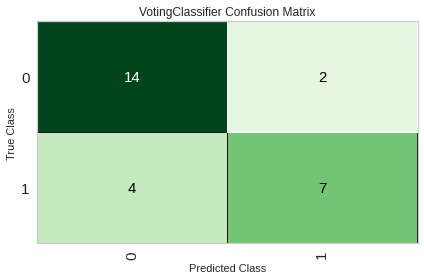

In [ ]:
plot_model(blend_soft, plot='confusion_matrix')

In [ ]:
blend_hard = blend_models(estimator_list = [top3[0], top3[1], top3[2]], method='hard')
score_blend_hard=pull()

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.0  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.0  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9565  0.0  1.0000  0.9091  0.9524  0.9125  0.9161
3       0.8261  0.0  0.6364  1.0000  0.7778  0.6462  0.6908
4       0.7826  0.0  0.6364  0.8750  0.7368  0.5594  0.5800
5       0.8696  0.0  0.7273  1.0000  0.8421  0.7356  0.7628
6       0.6957  0.0  0.7273  0.6667  0.6957  0.3925  0.3939
7       0.9565  0.0  0.9091  1.0000  0.9524  0.9125  0.9161
8       0.6818  0.0  0.7000  0.6364  0.6667  0.3636  0.3651
9       0.7727  0.0  1.0000  0.6667  0.8000  0.5600  0.6236
Mean    0.8194  0.0  0.7936  0.8379  0.8020  0.6374  0.6561
SD      0.0883  0.0  0.1362  0.1392  0.0906  0.1756  0.1755

In [ ]:
evaluate_model(blend_hard)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

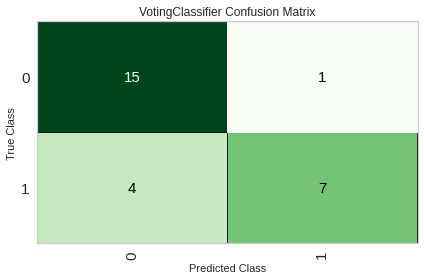

In [ ]:
plot_model(blend_hard, plot='confusion_matrix')

# Model Evaluation

In [ ]:
#Compare Model Summaries

#Not including base model 1 as tuned model 1 should be no worse
#display('Summary: model1')
#results_model1 = predict_model(model1)

display('Summary: tuned_model1')
display(score_tuned_model1)

display('Prediction: calibrated_model1')
display(score_calibrated_model1)

display('Prediction: bagged_model1')
display(score_bagged_model1)

#display('Prediction: boosted_model1')
#display(score_boosted_model1)

display('Prediction: blend_soft')
display(score_blend_soft)

display('Prediction: blend_hard')
display(score_blend_hard)



'Summary: tuned_model1'

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9385  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.9308  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.8696  0.9692  0.9000  0.8182  0.8571  0.7376  0.7405
3       0.7826  0.8030  0.5455  1.0000  0.7059  0.5560  0.6205
4       0.7826  0.8636  0.6364  0.8750  0.7368  0.5594  0.5800
5       0.9130  0.9167  0.8182  1.0000  0.9000  0.8244  0.8374
6       0.8261  0.8712  0.8182  0.8182  0.8182  0.6515  0.6515
7       0.9565  0.9924  0.9091  1.0000  0.9524  0.9125  0.9161
8       0.6818  0.8333  0.7000  0.6364  0.6667  0.3636  0.3651
9       0.8636  0.9583  1.0000  0.7692  0.8696  0.7317  0.7596
Mean    0.8328  0.9077  0.7927  0.8542  0.8103  0.6629  0.6783
SD      0.0721  0.0590  0.1355  0.1152  0.0849  0.1454  0.1432

'Prediction: calibrated_model1'

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9385  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.9154  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9565  0.9769  1.0000  0.9091  0.9524  0.9125  0.9161
3       0.7391  0.7955  0.5455  0.8571  0.6667  0.4692  0.5017
4       0.7391  0.8182  0.5455  0.8571  0.6667  0.4692  0.5017
5       0.7826  0.9318  0.5455  1.0000  0.7059  0.5560  0.6205
6       0.6522  0.7727  0.7273  0.6154  0.6667  0.3083  0.3130
7       0.9130  0.9848  0.9091  0.9091  0.9091  0.8258  0.8258
8       0.7273  0.8000  0.7000  0.7000  0.7000  0.4500  0.4500
9       0.8182  0.9500  0.9000  0.7500  0.8182  0.6393  0.6500
Mean    0.7980  0.8884  0.7473  0.8223  0.7681  0.5922  0.6091
SD      0.0859  0.0780  0.1624  0.1096  0.0992  0.1725  0.1684

'Prediction: bagged_model1'

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9308  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.8923  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9130  0.9769  0.9000  0.9000  0.9000  0.8231  0.8231
3       0.7391  0.7955  0.5455  0.8571  0.6667  0.4692  0.5017
4       0.7391  0.8485  0.5455  0.8571  0.6667  0.4692  0.5017
5       0.8696  0.9015  0.7273  1.0000  0.8421  0.7356  0.7628
6       0.7391  0.8561  0.8182  0.6923  0.7500  0.4812  0.4886
7       0.9565  0.9924  0.9091  1.0000  0.9524  0.9125  0.9161
8       0.7273  0.8333  0.7000  0.7000  0.7000  0.4500  0.4500
9       0.8636  0.9667  1.0000  0.7692  0.8696  0.7317  0.7596
Mean    0.8200  0.8994  0.7745  0.8401  0.7943  0.6365  0.6516
SD      0.0774  0.0631  0.1485  0.1054  0.0940  0.1565  0.1535

'Prediction: blend_soft'

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.9538  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.8769  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9130  0.9692  0.9000  0.9000  0.9000  0.8231  0.8231
3       0.8261  0.8409  0.6364  1.0000  0.7778  0.6462  0.6908
4       0.7391  0.8636  0.5455  0.8571  0.6667  0.4692  0.5017
5       0.8696  0.9470  0.7273  1.0000  0.8421  0.7356  0.7628
6       0.7391  0.8561  0.8182  0.6923  0.7500  0.4812  0.4886
7       0.9130  0.9924  0.8182  1.0000  0.9000  0.8244  0.8374
8       0.6818  0.8333  0.7000  0.6364  0.6667  0.3636  0.3651
9       0.8182  0.9750  1.0000  0.7143  0.8333  0.6452  0.6901
Mean    0.8152  0.9108  0.7745  0.8425  0.7933  0.6280  0.6472
SD      0.0720  0.0588  0.1308  0.1300  0.0786  0.1436  0.1451

'Prediction: blend_hard'

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8261  0.0  0.9000  0.7500  0.8182  0.6541  0.6641
1       0.8261  0.0  0.7000  0.8750  0.7778  0.6378  0.6485
2       0.9565  0.0  1.0000  0.9091  0.9524  0.9125  0.9161
3       0.8261  0.0  0.6364  1.0000  0.7778  0.6462  0.6908
4       0.7826  0.0  0.6364  0.8750  0.7368  0.5594  0.5800
5       0.8696  0.0  0.7273  1.0000  0.8421  0.7356  0.7628
6       0.6957  0.0  0.7273  0.6667  0.6957  0.3925  0.3939
7       0.9565  0.0  0.9091  1.0000  0.9524  0.9125  0.9161
8       0.6818  0.0  0.7000  0.6364  0.6667  0.3636  0.3651
9       0.7727  0.0  1.0000  0.6667  0.8000  0.5600  0.6236
Mean    0.8194  0.0  0.7936  0.8379  0.8020  0.6374  0.6561
SD      0.0883  0.0  0.1362  0.1392  0.0906  0.1756  0.1755

In [ ]:
#Compare Model Prediction Summaries
display('Prediction: model1')
results_model1 = predict_model(model1)
display('Prediction: tuned_model1')
results_tuned_model1 = predict_model(tuned_model1)
display('Prediction: calibrated_model1')
results_calibrated_model1 = predict_model(calibrated_model1)
display('Prediction: bagged_model1')
results_bagged_model1 = predict_model(bagged_model1)
#display('Prediction: boosted_model1')
#results_boosted_model1 = predict_model(boosted_model1)
display('Prediction: blend_soft')
results_boosted_model1 = predict_model(blend_soft)
display('Prediction: blend_hard')
results_boosted_model1 = predict_model(blend_hard)

'Prediction: model1'

Model  Accuracy    AUC  Recall  Prec.      F1   Kappa     MCC
0  MLP Classifier    0.7407  0.875  0.6364    0.7  0.6667  0.4553  0.4567

'Prediction: tuned_model1'

Model  Accuracy    AUC  Recall  Prec.      F1  Kappa     MCC
0  MLP Classifier    0.8148  0.875  0.7273    0.8  0.7619  0.611  0.6128

'Prediction: calibrated_model1'

Model  Accuracy     AUC  Recall   Prec.   F1   Kappa    MCC
0  MLP Classifier    0.7778  0.8239  0.6364  0.7778  0.7  0.5263  0.533

'Prediction: bagged_model1'

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  MLP Classifier    0.7778  0.8523  0.7273  0.7273  0.7273  0.5398  0.5398

'Prediction: blend_soft'

Model  Accuracy    AUC  Recall   Prec.   F1   Kappa    MCC
0  Voting Classifier    0.7778  0.858  0.6364  0.7778  0.7  0.5263  0.533

'Prediction: blend_hard'

Model  Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
0  Voting Classifier    0.8148  0.7869  0.6364  0.875  0.7368  0.5994  0.6175

# Model Finalization

In [ ]:
 #Choose winning model and set to "winning_model"
 final_model = finalize_model(tuned_model1)
 print (final_model)

MLPClassifier(activation='identity', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


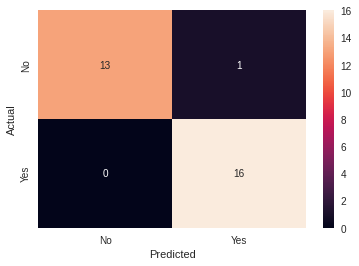

Age  Gender    Chest_Pain  ...  Heart_Disease  Label   Score
0    59    Male       Typical  ...            Yes    Yes  0.7575
1    66    Male      Atypical  ...            Yes    Yes  0.9791
2    59    Male      Atypical  ...             No     No  0.8144
3    56    Male      Atypical  ...             No     No  0.9392
4    68    Male   Not Anginal  ...             No     No  0.5909
5    67  Female   Not Anginal  ...             No     No  0.9054
6    66  Female   Not Anginal  ...             No     No  0.6915
7    59    Male   Not Anginal  ...            Yes    Yes  0.8199
8    58    Male   Not Anginal  ...            Yes    Yes  0.7789
9    50    Male   Not Anginal  ...             No     No  0.9372
10   46  Female   Not Anginal  ...             No     No  0.8693
11   44  Female   Not Anginal  ...             No     No  0.8271
12   44    Male   Not Anginal  ...             No     No  0.9487
13   44    Male   Not Anginal  ...             No     No  0.9646
14   39  Female   Not Anginal  ...             No     No  0.9340
15   70    Male  Asymptomatic  ...            Yes    Yes  0.9667
16   64  Female  Asymptomatic  ...             No    Yes  0.9240
17   62  Female  Asymptomatic  ...             No     No  0.9574
18   61    Male  Asymptomatic  ...            Yes    Yes  0.9813
19   60    Male  Asymptomatic  ...            Yes    Yes  0.9976
20   60    Male  Asymptomatic  ...            Yes    Yes  0.9179
21   58  Female  Asymptomatic  ...             No     No  0.7348
22   56    Male  Asymptomatic  ...            Yes    Yes  0.9222
23   56    Male  Asymptomatic  ...            Yes    Yes  0.9311
24   52    Male  Asymptomatic  ...            Yes    Yes  0.8050
25   48    Male  Asymptomatic  ...            Yes    Yes  0.9718
26   47    Male  Asymptomatic  ...            Yes    Yes  0.9815
27   46    Male  Asymptomatic  ...            Yes    Yes  0.6860
28   42    Male  Asymptomatic  ...            Yes    Yes  0.9544
29   40    Male  Asymptomatic  ...            Yes    Yes  0.7948

[30 rows x 16 columns]

In [ ]:
results_final_model = predict_model(final_model, data=data_unseen)
holdout_score=pull()
confusion_matrix_final = pd.crosstab(results_final_model[TARGET_COLUMN], results_final_model['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_final, annot=True)
plt.show()
display(results_final_model)

In [ ]:
save_model(final_model, 'Final-ML1000-P1-Heart-20211015')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Heart_Disease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numer...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, epsilon=1e-08,
                                hidden_layer_sizes=[100],
                               

# All Models - Conf. Matrix (unseen data)

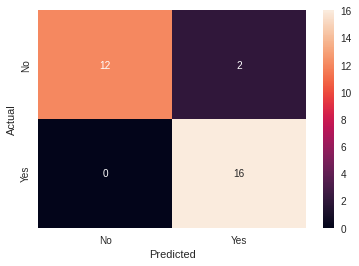

In [ ]:
pred_unseen_model1 = predict_model(model1, data=data_unseen)
confusion_matrix_m1 = pd.crosstab(pred_unseen_model1[TARGET_COLUMN], pred_unseen_model1['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

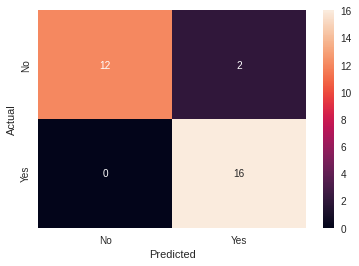

In [ ]:
pred_unseen_tuned_model1 = predict_model(tuned_model1, data=data_unseen)
confusion_matrix_m1 = pd.crosstab(pred_unseen_tuned_model1[TARGET_COLUMN], pred_unseen_tuned_model1['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

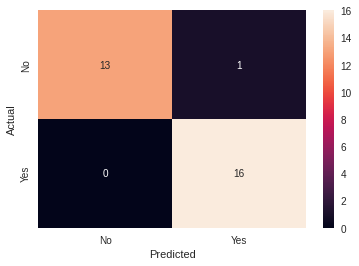

In [ ]:
pred_unseen_calibrated_model1 = predict_model(calibrated_model1, data=data_unseen)
confusion_matrix_m1 = pd.crosstab(pred_unseen_calibrated_model1[TARGET_COLUMN], pred_unseen_calibrated_model1['Label'], rownames=['Actual'],colnames=['Predicted']) # , margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

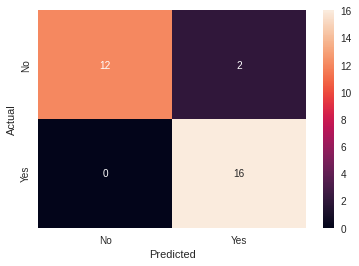

In [ ]:
pred_unseen_bagged_model1 = predict_model(bagged_model1, data=data_unseen)
confusion_matrix_m1 = pd.crosstab(pred_unseen_bagged_model1[TARGET_COLUMN], pred_unseen_bagged_model1['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

In [ ]:
#pred_unseen_boosted_model1 = predict_model(boosted_model1, data=data_unseen)
#confusion_matrix_m1 = pd.crosstab(pred_unseen_boosted_model1[TARGET_COLUMN], pred_unseen_boosted_model1['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
#sns.heatmap(confusion_matrix_m1, annot=True)
#plt.show()

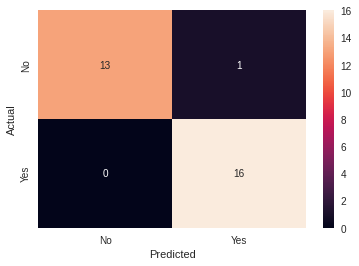

In [ ]:
pred_unseen_blend_soft = predict_model(blend_soft, data=data_unseen)
confusion_matrix_m1 = pd.crosstab(pred_unseen_blend_soft[TARGET_COLUMN], pred_unseen_blend_soft['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

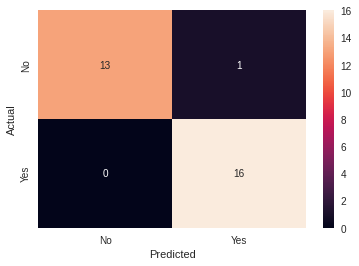

In [ ]:
pred_unseen_blend_hard = predict_model(blend_hard, data=data_unseen)
confusion_matrix_m1 = pd.crosstab(pred_unseen_blend_hard[TARGET_COLUMN], pred_unseen_blend_hard['Label'], rownames=['Actual'],colnames=['Predicted'])  #, margins=True)
sns.heatmap(confusion_matrix_m1, annot=True)
plt.show()

# Scratchpad

In [ ]:
#note